# Impact metrics submitted by Optimism RPGF3 applicants


**Most recent data pull: morning of October 23**

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import seaborn as sns

#nltk.download('punkt')
#nltk.download('stopwords')

# Load and process attestation data

In [2]:
df = pd.read_csv("data/RPGF3/tidy_attestations.csv")
df.rename(columns={'urlType': 'Website'}, inplace=True)
df.tail(2).T

,7633,7634
id,0xfe9dac03e5168415428bacaeaab40470bc95d66495fe...,0xfe9dac03e5168415428bacaeaab40470bc95d66495fe...
attester,0x3B2d493a88D97D26BE518c8048778d155831462B,0x3B2d493a88D97D26BE518c8048778d155831462B
timeCreated,1698020625,1698020625
name,Woosh,Woosh
applicationMetadataPtr,https://content.optimism.io/rpgf3Application/v...,https://content.optimism.io/rpgf3Application/v...
applicantType,PROJECT,PROJECT
bio or description,A payments dApp that allows you to send funds ...,A payments dApp that allows you to send funds ...
impactCategory(ies),END_USER_EXPERIENCE_AND_ADOPTION,END_USER_EXPERIENCE_AND_ADOPTION
attestationType,contributionLink,impactMetric
attestationUrl,https://optimistic.etherscan.io/address/0xEDBa...,https://narrow-porkpie-5d3.notion.site/October...


In [3]:
CATEGORIES = ['OP_STACK', 'DEVELOPER_ECOSYSTEM', 'END_USER_EXPERIENCE_AND_ADOPTION', 'COLLECTIVE_GOVERNANCE']
LABELS = ['OP Stack', 'Developer Ecosystem', 'End User Experience', 'Collective Governance']

def explode_categories(row):
    categories = row['impactCategory(ies)'].split(', ')
    for cat in CATEGORIES:
        row[cat] = cat in categories
    return row

df = df.apply(explode_categories, axis=1)
df.rename(columns=dict(zip(CATEGORIES,LABELS)), inplace=True)
df.tail(2).T

,7633,7634
id,0xfe9dac03e5168415428bacaeaab40470bc95d66495fe...,0xfe9dac03e5168415428bacaeaab40470bc95d66495fe...
attester,0x3B2d493a88D97D26BE518c8048778d155831462B,0x3B2d493a88D97D26BE518c8048778d155831462B
timeCreated,1698020625,1698020625
name,Woosh,Woosh
applicationMetadataPtr,https://content.optimism.io/rpgf3Application/v...,https://content.optimism.io/rpgf3Application/v...
applicantType,PROJECT,PROJECT
bio or description,A payments dApp that allows you to send funds ...,A payments dApp that allows you to send funds ...
impactCategory(ies),END_USER_EXPERIENCE_AND_ADOPTION,END_USER_EXPERIENCE_AND_ADOPTION
attestationType,contributionLink,impactMetric
attestationUrl,https://optimistic.etherscan.io/address/0xEDBa...,https://narrow-porkpie-5d3.notion.site/October...


# Analysis modules

In [4]:
def source_heatmap(attestation_type):
    
    filtered_data = df[df['attestationType'] == attestation_type]
    heatmap_data = filtered_data.groupby('Website')[LABELS].sum()
    significant_websites = filtered_data.groupby('Website')['attester'].nunique()
    indices = significant_websites[significant_websites>1].sort_values(ascending=False).index
    heatmap_data = heatmap_data.map(lambda x: None if x == 0 else x)
    heatmap_data = heatmap_data.loc[indices,]
    
    rows, cols = heatmap_data.shape
    fig, ax = plt.subplots(figsize=(cols*2, rows*.3), dpi=300)
    sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt=".0f", cbar=False, linewidths=1)
    ax.xaxis.set_ticks_position('top')
    ax.set_title(f"Number of {attestation_type} attested to by source (external website)\n")
    ax.tick_params(axis='x', labelrotation=0)

    plt.show()

In [5]:
STOPWORDS = nltk.corpus.stopwords.words('english') 
STOPWORDS.extend(['github', 'number', 'using', 'repo', 'idea', 'repository', 'twitter', 'x',
                  'optimism', 'open', 'source', 'projects','op', 'size', 'total'])

WEBSITES = ['github', 'etherscan', 'dune', 'twitter', 'optimism', 'google']

def get_most_common_metrics(attestation_type):
    
    for website in WEBSITES:
        print(f"Most common keywords for {website.upper()}...")
        filtered_data = df[(df['attestationType'] == attestation_type) & (df['Website'] == website)]        
        text = " ".join(filtered_data['attestationDescription'].dropna())
        tokens = [word.lower() for word in nltk.word_tokenize(text) if word.isalpha()]
        filtered_tokens = [word for word in tokens if word not in STOPWORDS]
        word_freq = Counter(filtered_tokens)
        common_keywords = word_freq.most_common(20)
        common_keywords = [(x, count) for x, count in common_keywords if count >= 2]
        for (word, count) in common_keywords:
            print(word, count)
        print()

# Results

## Impact Metrics

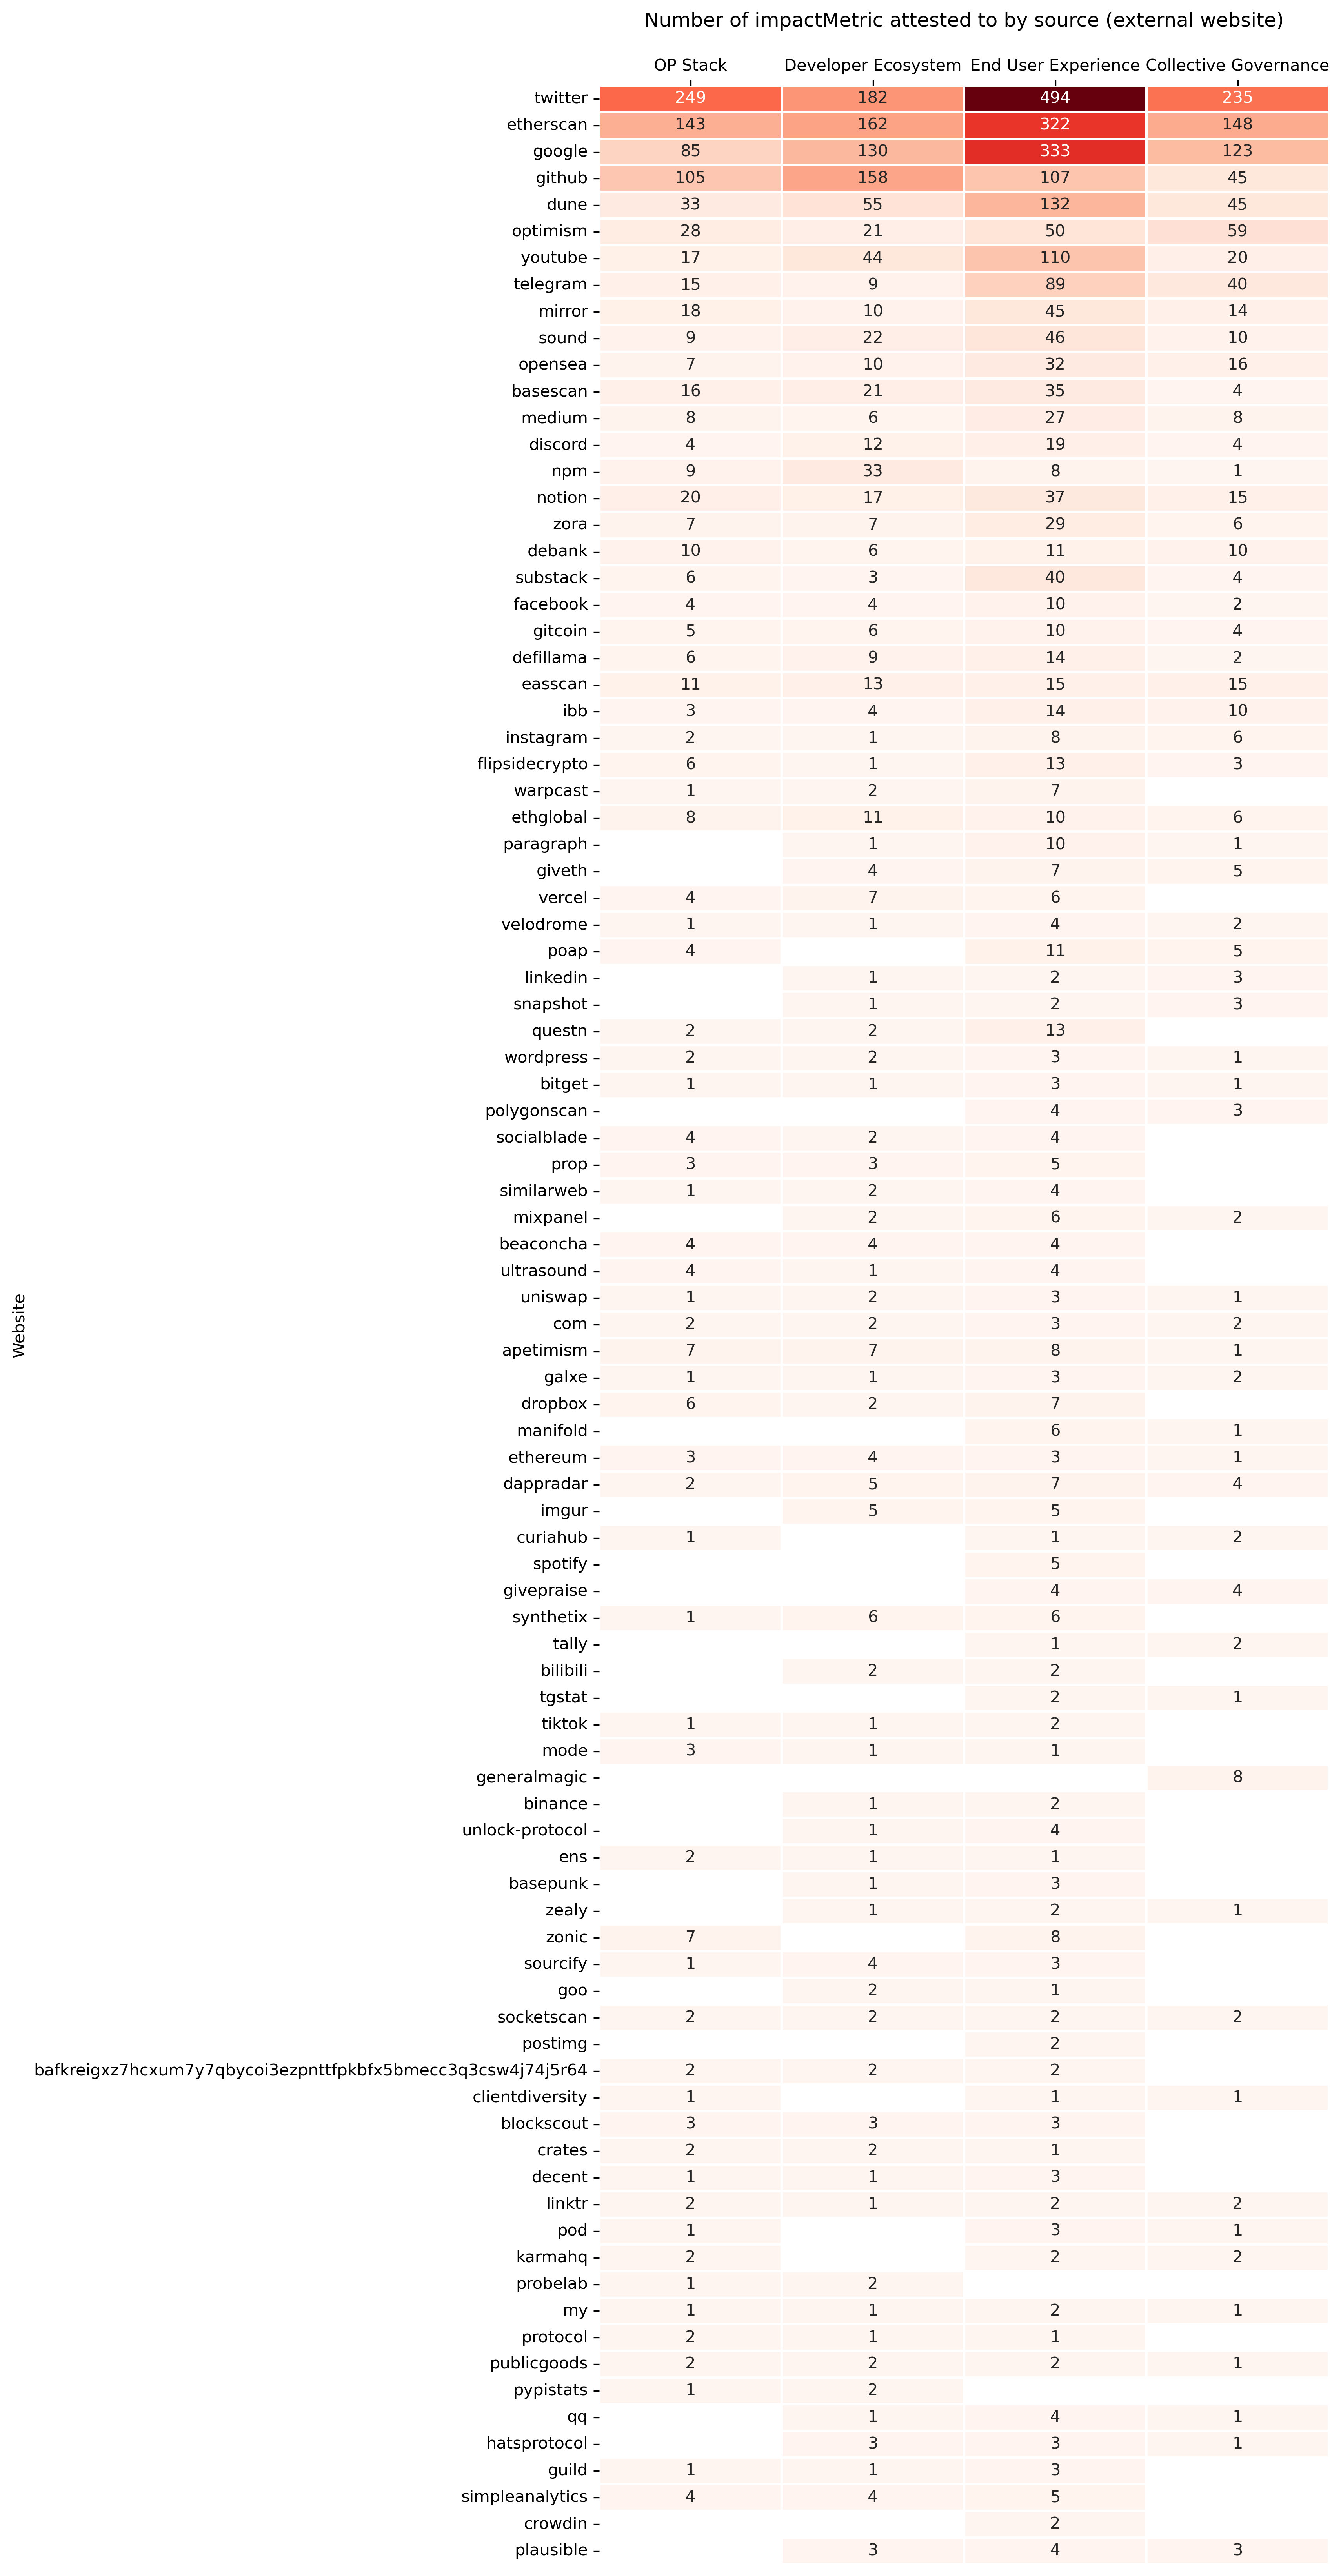

In [6]:
source_heatmap('impactMetric')

In [7]:
get_most_common_metrics('impactMetric')

Most common keywords for GITHUB...
stars 63
forks 12
clones 7
commits 7
repositories 5
contributors 5
pull 4
https 4
unique 4
downloads 4
dependent 4
contracts 3
synpress 3
fork 3
original 3
findings 3
code 3
developers 3
smart 2
requests 2

Most common keywords for ETHERSCAN...
transactions 29
contract 16
users 15
mint 12
nft 12
transaction 11
address 10
contracts 9
wallet 9
transections 9
promotion 8
bridge 7
downloads 6
badge 6
types 6
mints 6
holders 6
deployed 5
onchain 5
metric 5

Most common keywords for DUNE...
users 25
dune 20
stars 13
transactions 11
quests 11
userops 9
favorite 9
driven 9
unique 8
dashboard 7
created 5
oct 5
value 5
base 5
analytics 4
daos 4
gas 4
active 4
chain 4
cumulative 4

Most common keywords for TWITTER...
views 111
followers 42
tweet 27
engagement 19
impressions 17
post 15
thread 15
listeners 14
stack 13
likes 11
view 11
participants 11
article 10
content 8
users 7
impression 7
announcement 7
reach 6
https 6
week 6

Most common keywords for OPTIMISM.

## Contributions

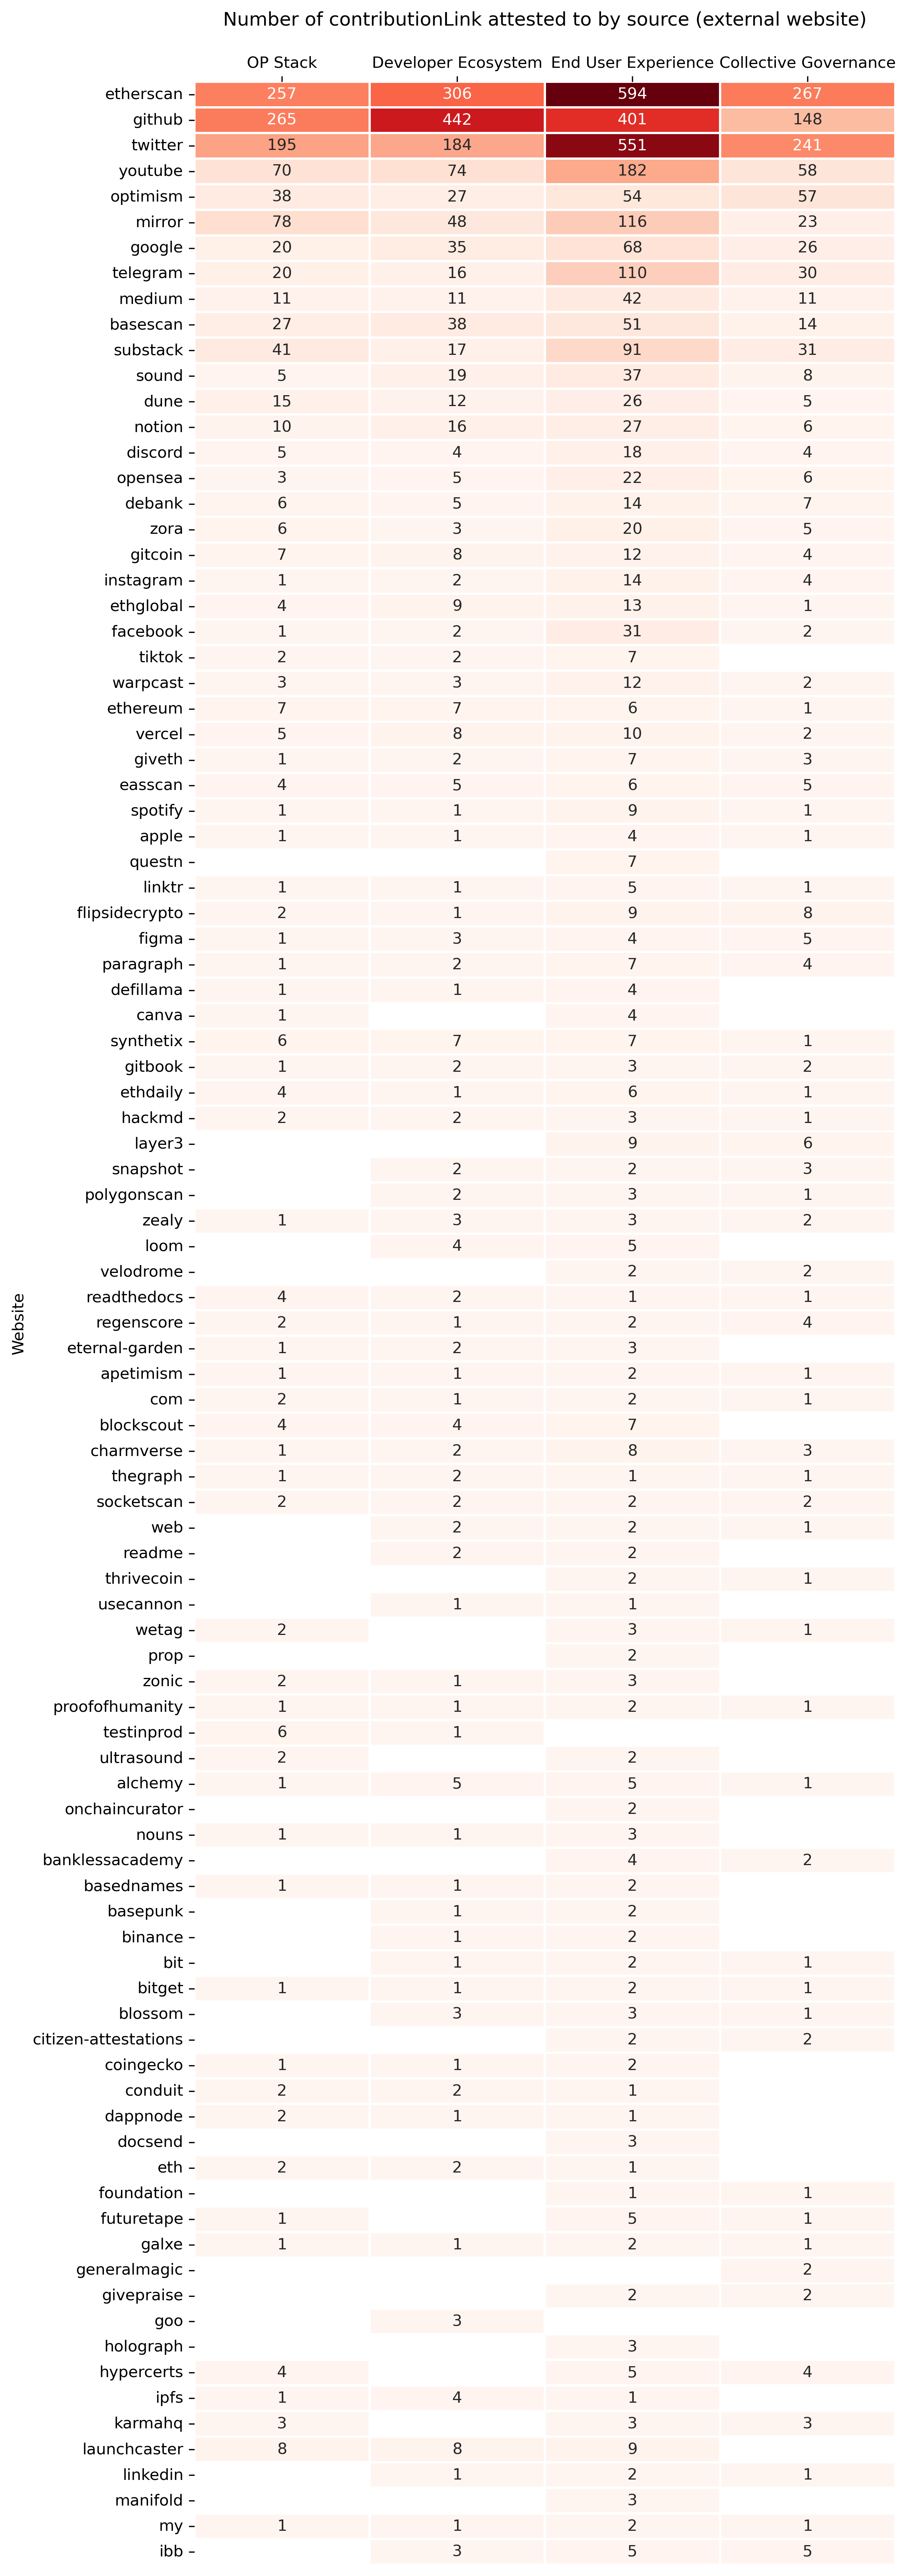

In [8]:
source_heatmap('contributionLink')

In [9]:
get_most_common_metrics('contributionLink')

Most common keywords for GITHUB...
code 56
contracts 33
project 32
protocol 21
game 21
contract 16
main 16
security 16
solidity 15
client 15
stack 14
ecosystem 14
implementation 13
onchain 13
smart 13
tool 12
uses 12
contributions 11
frontend 11
backend 11

Most common keywords for ETHERSCAN...
contract 164
nft 76
series 30
address 27
mint 27
basics 25
crypto 24
wallet 23
nfts 23
transaction 22
dao 20
mainnet 18
etherscan 17
token 17
music 17
transactions 15
factory 15
network 14
urban 14
onchain 13

Most common keywords for DUNE...
dune 23
dashboard 21
analytics 5
governance 2
link 2
adoption 2
overview 2
token 2
profile 2

Most common keywords for TWITTER...
thread 54
post 43
tweet 41
account 23
nft 20
stack 14
bedrock 14
governance 13
community 13
content 13
project 12
news 12
base 11
onchain 11
rollups 11
covering 11
link 11
host 11
new 10
ethereum 10

Most common keywords for OPTIMISM...
roundup 8
cycle 7
final 6
grants 6
education 5
public 5
goods 5
rpgf 5
stack 5
mission 4
propo

## Validation of links

In [10]:
# number of projects with a valid artifact link

print(
    df[df['cleanArtifactLink'].isna()==False]['applicationMetadataPtr'].nunique(),
    "out of", df['applicationMetadataPtr'].nunique(), "applicants"
)
df[df['cleanArtifactLink'].isna()==False].groupby('Website')['applicationMetadataPtr'].nunique()

892 out of 1398 applicants


Website
etherscan    316
github       338
npm           21
substack      35
twitter      432
Name: applicationMetadataPtr, dtype: int64

In [11]:
# share of links from selected websites that were validated

(
    df[df['cleanArtifactLink'].isna()==False].groupby('Website')['applicationMetadataPtr'].nunique() 
    / df.groupby('Website')['applicationMetadataPtr'].nunique()
).dropna()

Website
etherscan    0.681034
github       0.891821
npm          1.000000
substack     1.000000
twitter      0.975169
Name: applicationMetadataPtr, dtype: float64

## Collisions

In [12]:
df[~df['potentialConflict'].isna()].tail(2).T

,7112,7539
id,0x621d5a35c3f1adc137b749da5ba1763ad32b364bcaca...,0xe4fb6e52ad970ebb6ea9252ec6e9967e4b4b88d52e50...
attester,0xE1e5dcbBc95aabE80E2f9c65C7A2cEF85daF61C4,0x5F4BCCcb5C2CBB01c619F5CFED555466e31679b6
timeCreated,1698017171,1698028667
name,piurana_inBlock - Stay Optimistic,OP Friday Twitter Thread Translation Contest
applicationMetadataPtr,https://content.optimism.io/rpgf3Application/v...,https://content.optimism.io/rpgf3Application/v...
applicantType,INDIVIDUAL,PROJECT
bio or description,Product Manager navigating in web3 ecosystem w...,Translate official OP Friday Threads from 1 Se...
impactCategory(ies),"COLLECTIVE_GOVERNANCE, END_USER_EXPERIENCE_AND...",END_USER_EXPERIENCE_AND_ADOPTION
attestationType,contributionLink,contributionLink
attestationUrl,https://x.com/piurana_inblock/status/169128323...,https://twitter.com/optimismFND/status/1712903...


In [13]:
df[~df['potentialConflict'].isna()]['cleanArtifactLink'].value_counts()

cleanArtifactLink
https://x.com/optimismfnd                                                             10
https://x.com/thesecureum                                                             10
https://x.com/piurana_inblock                                                          8
https://x.com/user                                                                     6
https://x.com/zachxbt                                                                  6
https://x.com/op_divergent                                                             5
https://github.com/ethereum-optimism/optimism                                          5
https://x.com/retropgf                                                                 4
https://x.com/zenbitmx                                                                 4
https://github.com/ethereum-optimism                                                   4
https://github.com/primitivefinance/arbiter                                            4
htt

# BACKUP

In [14]:
def plot_category(impact_category):

    fig, ax = plt.subplots(figsize=(10,5))

    dff = df[df['impactCategory(ies)'].str.contains(impact_category)]
    num_projects = dff['attester'].nunique()

    (dff
     .query("attestationType == 'impactMetric'")
     .groupby('Website')['attester']
     .nunique()
     .sort_values()
     .tail(20)
     / num_projects
    ).plot(kind='barh', color="#FF0420")

    ax.set_title(f"{impact_category} ({num_projects} projects)")

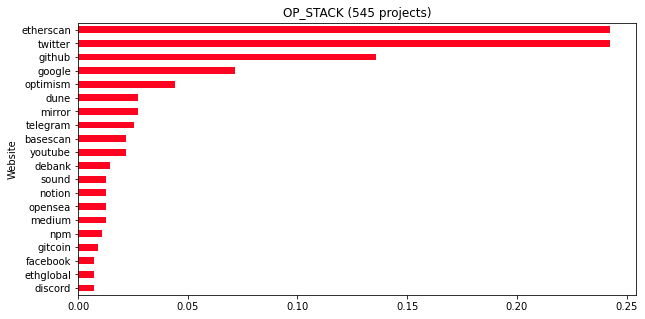

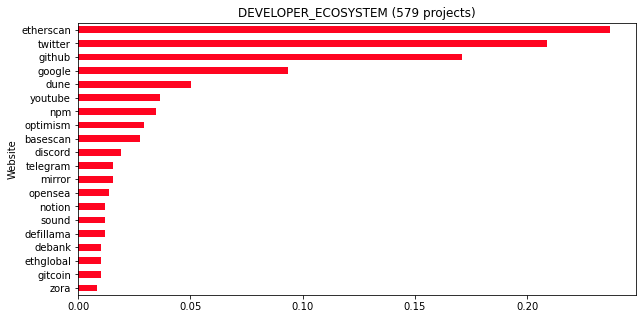

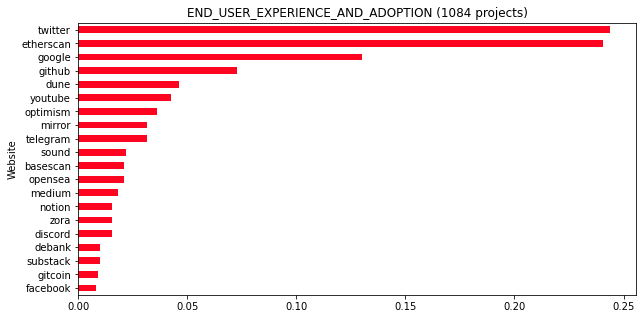

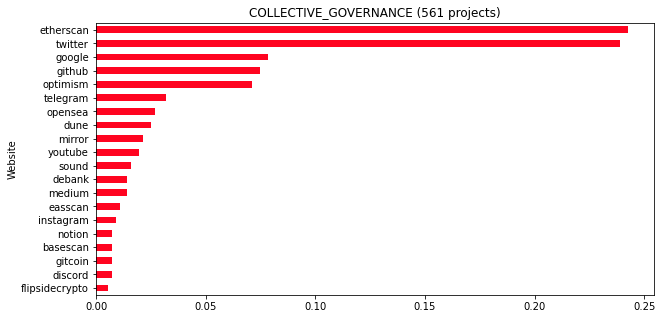

In [15]:
for c in CATEGORIES:
    plot_category(c)